# 텍스트 빈도 분석 -1 영어

## 0)필요한 모듈 설치

In [1]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.4 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 330.3 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/96.5 kB 365.7 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 425.1 kB/s eta 0:00:00


In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 1) 필요한 모듈 import

In [46]:
import pandas as pd
import glob
import re
from functools import reduce
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

## 2) 데이터 load

In [9]:
# 모든 파일 가져오기.
# * : 와일드 카드

all_files = glob.glob("myCabinetExcelData*.xls")
all_files

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [13]:
# 모든 파일을 하나의 dataframe에 저장

all_files_data = []     # 저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [23]:
# ignore_index=True0부터 99까지의 index가 겹치므로 기존 index를 무시하겠다는 의미
all_files_data_concat = pd.concat(all_files_data, axis= 0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [25]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding ='utf-8', index= False)

## 3) 데이터 전처리

In [17]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [33]:
# 영어 불용어 집합 생성
stopWords = set(stopwords.words("english"))

# WordNet 형태소 분석기 초기화
lemma = WordNetLemmatizer()

### 불용어(Stopwords)
자연어 처리(NLP)에서 문장에서 의미가 적거나, 자주 사용되지만 분석에 큰 도움이 되지 않는 단어
ex) 영어에서는 "the", "is", "in", "and"와 같은 단어.

불용어는 일반적으로 다음과 같은 이유로 제거됩니다:

- 의미 감소: 불용어는 문장의 핵심 의미를 전달하지 않기 때문에, 분석에 방해가 될 수 있습니다.
- 데이터 감소: 불용어를 제거하면 데이터의 크기를 줄일 수 있어 처리 속도가 빨라집니다.
- 모델 성능 향상: 불필요한 단어를 제거함으로써 머신러닝 모델의 성능을 향상시킬 수 있습니다.

따라서 자연어 처리 작업에서 불용어를 식별하고 제거하는 과정은 매우 중요합니다.

In [37]:
# 최종 단어 리스트 초기화
words = []

# 모든 제목에 대해 반복
for title in all_title:
    # 제목에서 알파벳이 아닌 문자 제거하고 소문자로 변환
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    
    # 단어 토큰화: 문자열을 단어 목록으로 변환
    EnWordsToken = word_tokenize(EnWords.lower())
    
    # 불용어 제거: 불용어가 아닌 단어만 필터링
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    
    # 형태소 분석: 각 단어를 표제어로 변환
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    # 최종 단어 목록에 추가
    words.append(EnWordsTokenStopLemma)

# 최종 단어 리스트 출력
print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [42]:
# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

## 4) 데이터 탐색

In [48]:
count = Counter(words2)
count

Counter({'data': 1645,
         'big': 1354,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [116]:
word_count = dict()
for tag, counts in count.most_common(50):    # 상위 50개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


In [59]:
# 검색어로 사용된 'big'과 'data' 삭제
del word_count['big']
del word_count['data']

word_count

{'analytics': 137,
 'analysis': 67,
 'based': 62,
 'using': 57,
 'system': 50,
 'science': 50,
 'management': 48,
 'challenge': 47,
 'approach': 44,
 'mining': 40,
 'new': 38,
 'research': 38,
 'health': 37,
 'model': 37,
 'cloud': 34,
 'smart': 34,
 'learning': 33,
 'opportunity': 31,
 'processing': 30,
 'technology': 28,
 'small': 27,
 'framework': 26,
 'information': 26,
 'computing': 25,
 'application': 25,
 'driven': 24,
 'social': 24,
 'issue': 24,
 'quality': 23,
 'network': 23,
 'deal': 23,
 'knowledge': 22,
 'efficient': 22,
 'review': 22,
 'use': 22,
 'era': 22,
 'healthcare': 21,
 'storage': 21,
 'service': 21,
 'perspective': 21,
 'open': 20,
 'platform': 19,
 'survey': 19,
 'making': 19,
 'process': 19,
 'distributed': 18,
 'large': 18,
 'environment': 18}

## 5) 결과 시각화

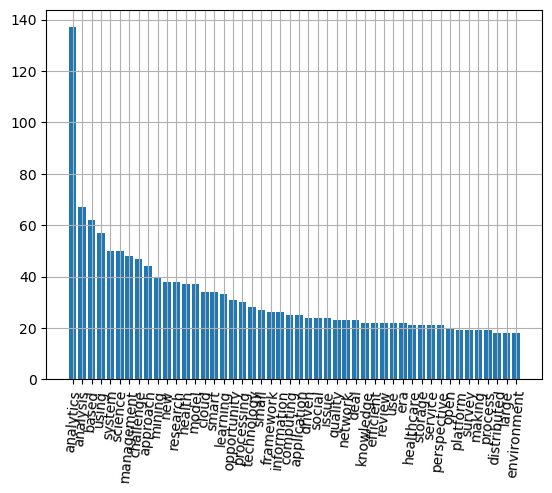

In [73]:
#막대그래프로 출력하기
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.grid(True)
plt.show()

In [75]:
# 출판일을 만들기
all_files_data_concat['doc_count']=0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


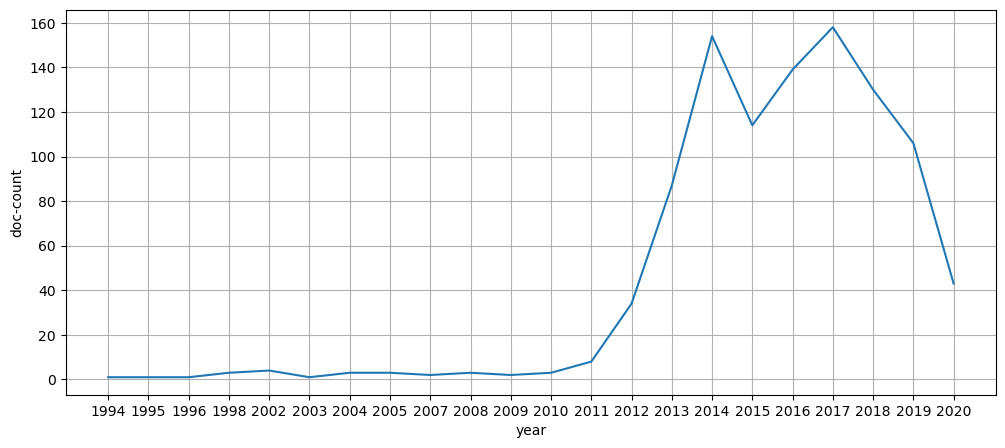

In [79]:
# 출판일을 기준으로 그래프 그리기
plt.figure(figsize = (12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

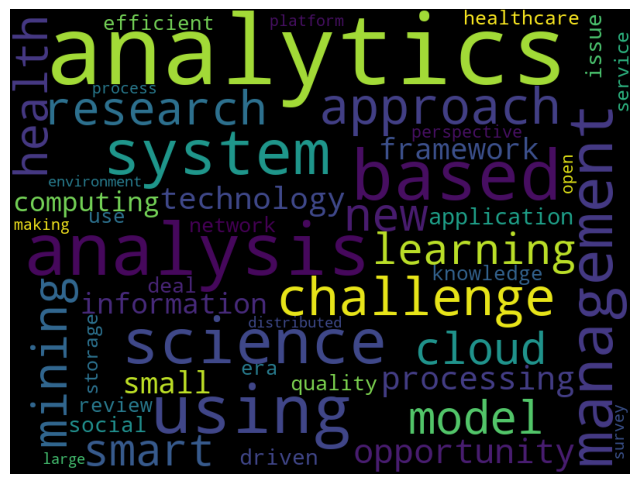

In [83]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'black', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [85]:
 cloud.to_file("riss_bigdata_wordCloud.jpg")

In [134]:
word_count2 = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count2[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18
method : 18
decision : 18
business : 18
market : 18
editorial : 17
privacy : 17
algorithm : 17
time : 17
care : 17
city : 17
question : 16
world : 16
earth : 16
machine : 15
insight : 15
value : 15
company : 15
need : 15
real : 14
predictive : 14
warehouse : 14
law : 14
design : 14
sharing : 14
potential : 14
discovery : 13
scalable : 13
u

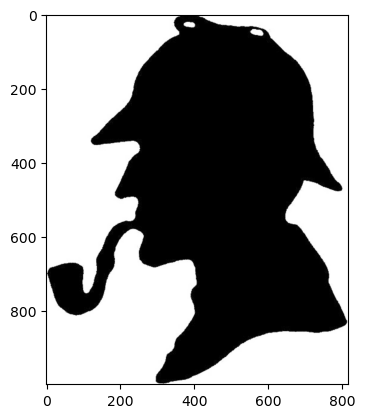

In [136]:
# https://m.blog.naver.com/vi_football/221775297963
from PIL import Image
import numpy as np

icon = Image.open('sherlock.png')    # 마스크가 될 이미지 불러오기 

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

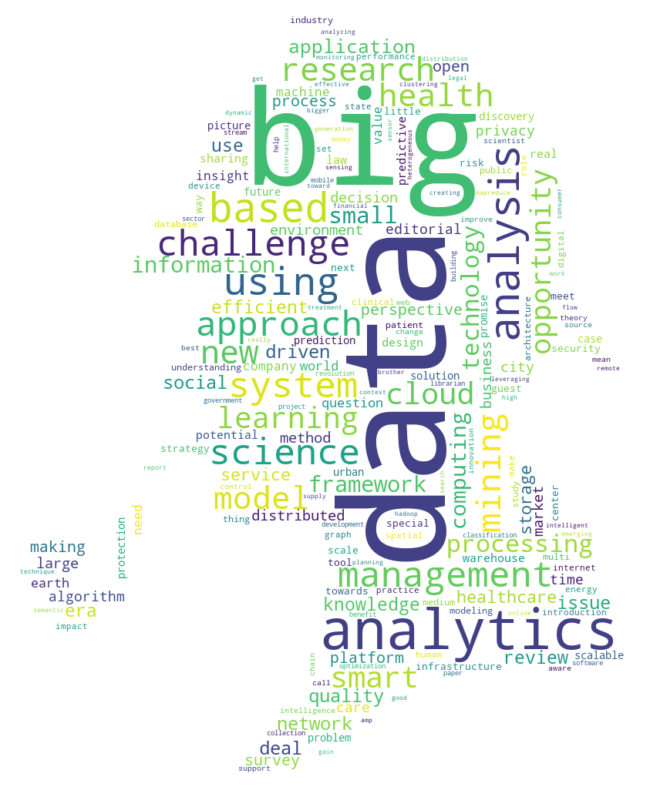

In [158]:
wc = WordCloud(#font_path='C:/Windows/Fonts/nanumgothicextrabold.ttf', #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask,                                             #마스크설정   
               #contour_color='brown',
               #contour_width=0.1 
)                                    

cloud = wc.generate_from_frequencies(word_count2)                            #사전형태의 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

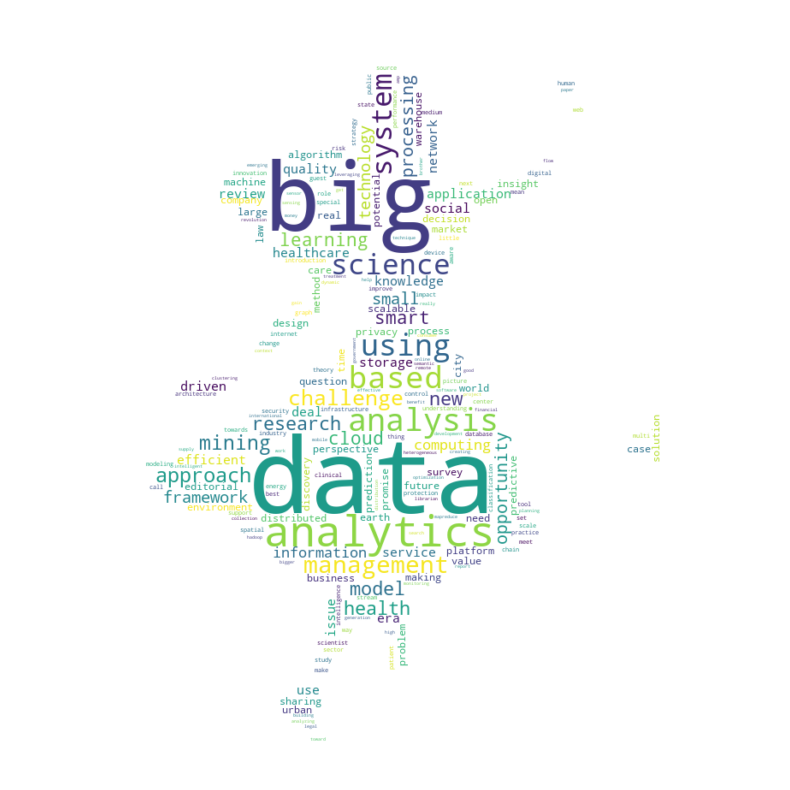

In [156]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

alice_mask = np.array(Image.open("alice_mask.png"))

wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask,
    contour_color='yellow',
    contour_width=0.1
)

wordcloud = wordcloud.generate_from_frequencies(word_count2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()